In [25]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [28]:
df = pd.read_csv('data/cars.csv')
df.columns = ['speed', 'dist']
df

,speed,dist
0,4,2
1,4,10
2,7,4
3,7,22
4,8,16
5,9,10
6,10,18
7,10,26
8,10,34
9,11,17


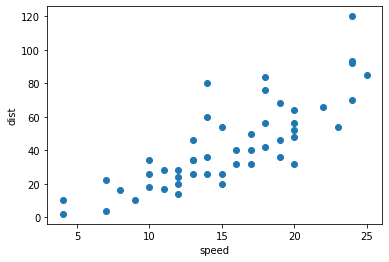

In [29]:
plt.xlabel('speed')
plt.ylabel('dist')
plt.scatter(df['speed'], df['dist'])
plt.show()

In [30]:
x = tf.placeholder(tf.float32)
y = tf.constant( df['dist'], tf.float32)

In [31]:
w = tf.Variable(tf.random_uniform([1]))
b = tf.Variable(tf.random_uniform([1]))

In [32]:
hx = w*x + b
cost = tf.reduce_mean(tf.square(hx-y))

In [33]:
optimizer = tf.train.GradientDescentOptimizer(0.001)#learning rate
train = optimizer.minimize( cost )

In [34]:
sess = tf.Session()
init =tf.global_variables_initializer()
sess.run( init)

In [35]:
for i in range(10000):
    sess.run(train,{x:df['speed']})
    if i%100==0:
        print(i, sess.run(cost,{x:df['speed']}) )

0 588.4201
100 259.70773
200 258.38757
300 257.12076
400 255.90518
500 254.73883
600 253.61961
700 252.54564
800 251.51514
900 250.52638
1000 249.57755
1100 248.66711
1200 247.79355
1300 246.95528
1400 246.1509
1500 245.37904
1600 244.63849
1700 243.9278
1800 243.24597
1900 242.59166
2000 241.96382
2100 241.36139
2200 240.78325
2300 240.2286
2400 239.69629
2500 239.18556
2600 238.69554
2700 238.22525
2800 237.77402
2900 237.34108
3000 236.92564
3100 236.52692
3200 236.14445
3300 235.77736
3400 235.42516
3500 235.08722
3600 234.76292
3700 234.4518
3800 234.15314
3900 233.86668
4000 233.59178
4100 233.32797
4200 233.07489
4300 232.83202
4400 232.59889
4500 232.37527
4600 232.1607
4700 231.95477
4800 231.75723
4900 231.56761
5000 231.38573
5100 231.21115
5200 231.04366
5300 230.88297
5400 230.72874
5500 230.58075
5600 230.4387
5700 230.3025
5800 230.1718
5900 230.04634
6000 229.9259
6100 229.81041
6200 229.69957
6300 229.5932
6400 229.49117
6500 229.39328
6600 229.29926
6700 229.20918
680

In [36]:
sess.run(w)

array([3.7984936], dtype=float32)

In [37]:
sess.run(b)

array([-15.279434], dtype=float32)

In [38]:
# 자동차속도가 30과 50일때 각각의 제동거리를 구하시요
sess.run(hx,{x:[30,50]})

array([ 98.67538, 174.64525], dtype=float32)

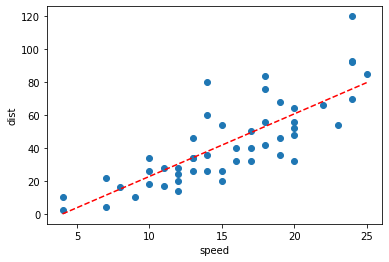

In [39]:
# 실측데이터는 scatter로
# 예측데이터는 라인그래프로 그려주시요 

plt.xlabel('speed')
plt.ylabel('dist')
plt.scatter(df['speed'], df['dist'])
plt.plot(df['speed'], sess.run(hx, {x:df['speed']}), 'r--')
plt.show()